In [1]:
from io import BytesIO
import chess
import chess.svg
import cairosvg
from PIL import Image, ImageDraw
import pandas as pd
import tensorflow as tf



/tmp/ipykernel_225309/1674048033.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-03-15 17:02:23.123347: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-15 17:02:23.162245: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 17:02:23.162277: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugi

In [2]:
#/home/jk/CityUSeattle/artificial_intel_for_data_sciecnce_DS510/team-project/chess_prediction_ml_ds510/data/100_fen.csv
data = pd.read_csv("../data/100_fen.csv")
data.head()

,Board_FEN,Best_Move
0,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w...,a2a3
1,rnbqkbnr/pppppppp/8/8/8/P7/1PPPPPPP/RNBQKBNR b...,g8f6
2,rnbqkb1r/pppppppp/5n2/8/8/P7/1PPPPPPP/RNBQKBNR...,d2d4
3,rnbqkb1r/pppppppp/5n2/8/3P4/P7/1PP1PPPP/RNBQKB...,g7g6
4,rnbqkb1r/pppppp1p/5np1/8/3P4/P7/1PP1PPPP/RNBQK...,b1c3


In [3]:
images = []
# Iterate through each row in the CSV file
for index, row in data.iterrows():
    fen = row[0]
    best_move = row[1]

    # Parse FEN string
    board = chess.Board(fen)

    # Generate SVG representation of the board
    svg_data = chess.svg.board(board=board)

    # Convert SVG to PNG image
    png_data = cairosvg.svg2png(bytestring=svg_data)

    # Convert PNG to PIL Image
    image = Image.open(BytesIO(png_data))

    # Highlight best move
    square_size = image.width // 8
    border_offset = square_size // 2

    # Highlight best move
    # Example: Assuming best_move is in algebraic notation (e.g., "e2e4")
    from_square = chess.SQUARE_NAMES.index(best_move[:2])
    to_square = chess.SQUARE_NAMES.index(best_move[2:])
    from_x, from_y = (from_square % 8) * square_size + border_offset, (7 - from_square // 8) * square_size + border_offset
    to_x, to_y = (to_square % 8) * square_size + border_offset, (7 - to_square // 8) * square_size + border_offset

    # Calculate the halfway point between start and end
    half_x = (from_x + to_x) // 2
    half_y = (from_y + to_y) // 2

    # Draw the line
    draw = ImageDraw.Draw(image)
    draw.line([(half_x, half_y), (to_x, to_y)], fill="red", width=3)

    # Draw an "X" shape at the start and end positions
    draw.line([(from_x - 10, from_y - 10), (from_x + 10, from_y + 10)], fill="blue", width=3)
    draw.line([(from_x - 10, from_y + 10), (from_x + 10, from_y - 10)], fill="blue", width=3)
    draw.line([(to_x - 10, to_y - 10), (to_x + 10, to_y + 10)], fill="green", width=3)
    draw.line([(to_x - 10, to_y + 10), (to_x + 10, to_y - 10)], fill="green", width=3)


    # Save or display image
    images.append((image, best_move))


/tmp/ipykernel_225309/3177806683.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fen = row[0]
/tmp/ipykernel_225309/3177806683.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_move = row[1]


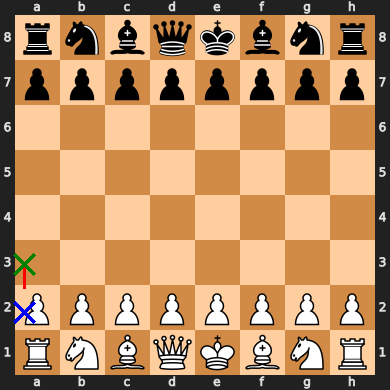

In [5]:
images[0][0]


In [6]:
from tensorflow.keras import layers, models


classifier =  models.Sequential() 
# Step 1 - Convolution  
classifier.add(layers.Conv2D(32, (3, 3),input_shape = (390, 390, 3), activation = 'relu')) 
# Step 2 - Pooling  
classifier.add(layers.MaxPooling2D(pool_size = (2, 2))) 
# Step 3 Adding a second convolutional layer and pooling layer  
classifier.add(layers.Conv2D(32, (3, 3), activation = 'relu')) 
classifier.add(layers.MaxPooling2D(pool_size = (2, 2))) 
# Step 4 - Flattening  
classifier.add(layers.Flatten()) 
# Step 5 - Full connection 
classifier.add(layers.Dense(units = 128, activation = 'relu')) 
classifier.add(layers.Dense(units = 1, activation = 'sigmoid')) 
# Compiling the CNN  
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 
 
#print("CNN Structure Summary") 
 
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 388, 388, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 194, 194, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 192, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 96, 96, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 294912)            0         
                                                                 
 dense (Dense)               (None, 128)               3

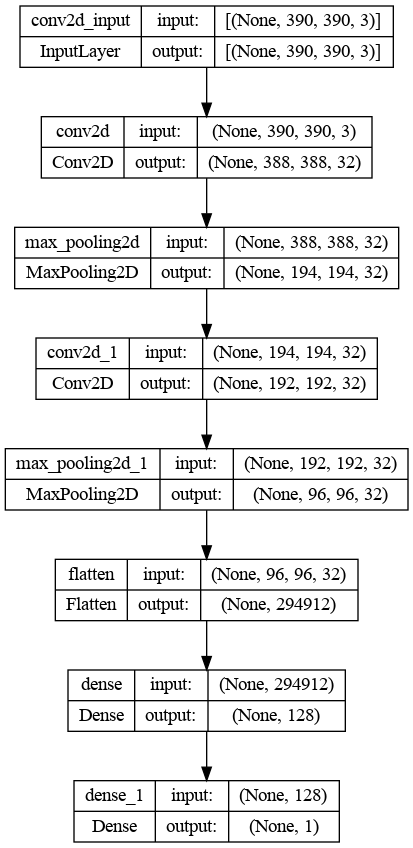

In [7]:
from keras.utils import plot_model
plot_model(classifier, to_file='tf_image_classifier.png', show_shapes=True, show_layer_names=True)

In [8]:

from sklearn.preprocessing import LabelEncoder
import numpy as np
print(type(images))

# Create a list of tuples (image, label)
images_with_labels = [(image, label) for image, label in images]

# Separate images and labels
print(images[0])
images, labels = zip(*images)

#encode the labels
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)


# Split the list of images with labels into training and test sets
train_images, test_images = np.array(images[:80]), np.array(images[80:])
train_encoded_labels, test_encoded_labels = np.array(encoded_labels[:80]), np.array(encoded_labels[80:])


train_image_dataset = tf.data.Dataset.from_tensor_slices(train_images)
train_label_dataset = tf.data.Dataset.from_tensor_slices(train_encoded_labels)
test_image_dataset = tf.data.Dataset.from_tensor_slices(test_images)
test_label_dataset = tf.data.Dataset.from_tensor_slices(test_encoded_labels)


<class 'list'>
(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=390x390 at 0x71678A87B580>, 'a2a3')


In [9]:
buffer_size = 10000
batch_size = 64
# Combine image and label datasets
train_dataset = tf.data.Dataset.zip((train_image_dataset, train_label_dataset))

# Shuffle and batch the dataset
train_dataset = train_dataset.shuffle(buffer_size).batch(batch_size)

# Now you can use train_dataset directly in the fit method
classifier.fit(train_dataset, epochs=25)


Epoch 1/25


2/2 [==============================] - 6s 1s/step - loss: -352988.4375 - accuracy: 0.0000e+00
Epoch 2/25
2/2 [==============================] - 5s 1s/step - loss: -4174508.7500 - accuracy: 0.0125
Epoch 3/25
2/2 [==============================] - 5s 1s/step - loss: -12153910.0000 - accuracy: 0.0125
Epoch 4/25
2/2 [==============================] - 5s 1s/step - loss: -25751406.0000 - accuracy: 0.0125
Epoch 5/25
2/2 [==============================] - 5s 1s/step - loss: -45838284.0000 - accuracy: 0.0125
Epoch 6/25
2/2 [==============================] - 6s 1s/step - loss: -79732872.0000 - accuracy: 0.0125
Epoch 7/25
2/2 [==============================] - 6s 1s/step - loss: -125132976.0000 - accuracy: 0.0125
Epoch 8/25
2/2 [==============================] - 6s 1s/step - loss: -191993680.0000 - accuracy: 0.0125
Epoch 9/25
2/2 [==============================] - 6s 1s/step - loss: -285574400.0000 - accuracy: 0.0125
Epoch 10/25
2/2 [==============================] - 6s 1s/step - loss: -416587040